<a href="https://colab.research.google.com/github/hemanthreddygangula/Mini-project/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import os
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Taking input


In [56]:
datadir = '/content/drive/MyDrive/Masks'
catagories = ['With Mask','Without Mask']

flat_data = []
target = []

for i in catagories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(90,90,3))
        flat_data.append(img_resized.flatten())
        target.append(catagories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data)
target=np.array(target)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data


loading... category : With Mask
loaded category:With Mask successfully
loading... category : Without Mask
loaded category:Without Mask successfully


<BarContainer object of 2 artists>

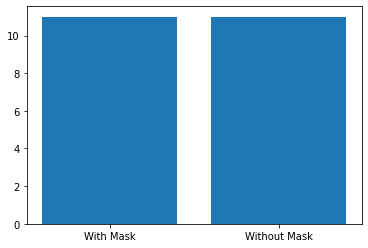

In [57]:
unique,count = np.unique(target,return_counts=True)
plt.bar(catagories,count)

Model Construction


In [58]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

Model Training


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')

Splitted Successfully
The Model is trained well with the given images


Model Testing

In [60]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 0 1 1]
The actual data is:
[1 1 0 0 1]
The model is 80.0% accurate


Excution


Enter URL of Image :/content/drive/MyDrive/Masks/2.jpg


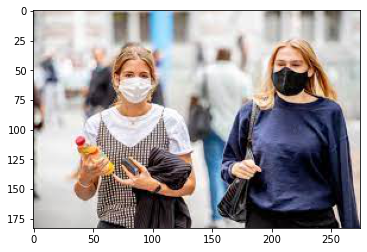

The predicted image is : With Mask


In [61]:
url=input('Enter Path of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(90,90,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
print("The predicted image is : "+catagories[model.predict(l)[0]])